Mohammad Mahdi Gheidi

98105976

Natural Language Processing Course - HW1 

Fall 2023 - Dr. Ehsaneddin Asgari


<div dir="rtl" style="font-size: 18px;">

در این نوت‌بوک به بررسی و آنالیز داده‌های آگهی‌های دسته خودروی سواری سایت دیوار خواهیم پرداخت.

داده‌های مورد استفاده در این نوتبوک به وسیله اسکریپت نوشته شده پایتون، که کنار این فایل قرار دارد از سایت دیوار کراول شده است.

در ابتدا داده‌ها را لود می‌کنیم و داده‌های مربوط به هر شهر را در متغیر‌های مربوط به خودش قرار می‌دهیم.

سپس به وسیله ابزار هضم، به پاکسازی داده‌ها و نرمال کردنشان می‌پردازیم.

در انتها نیز به بررسی و آنالیز داده‌های مربوط به آگهی‌ها می‌پردازیم.

</div>

<div dir="rtl" style="font-size: 18px;">

ابتدا کتابخانه‌هایی که در ادامه پروژه به آنها نیاز پیدا میکنیم را با کامند سیستمی نصب می‌کنیم.

</div>

In [10]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [11]:
import json
import re

import hazm
import matplotlib.pyplot as plt
import numpy as np
import tqdm
from pprint import pprint
from nltk import FreqDist

In [27]:
cities_slugs = ['tehran', 'karaj', 'isfahan', 'tabriz', 'urmia', 'rasht', 'sari', 'sanandaj']
data = {}
for city_slug in cities_slugs:
    with open(f'data/{city_slug}_car_datas.json', 'r') as f:
        data[city_slug] = json.load(f)

pprint(data['tabriz'][0])
pprint(data['urmia'][0])


{'color': 'سفید',
 'description': 'خودروی تمیز ✔️\n'
                'رنگ سفید✔️\n'
                'بدون رنگ✔️\n'
                'کم کار کرد ✔️\n'
                'ماشین جوان پسند',
 'milage': '۶۱٬۰۰۰',
 'model': '۱۴۰۰',
 'subtitle': 'دقایقی پیش در تبریز',
 'title': 'تیبا صندوق\u200cدار SX، مدل ۱۴۰۰'}
{'color': 'سفید',
 'description': 'فقط گلگیر جلو سمت شاگرد تعویض شده با شماره *********** تماس '
                'بگیرید',
 'milage': '۱۷۰٬۰۰۰',
 'model': '۱۳۹۲',
 'subtitle': 'دقایقی پیش در ارومیه',
 'title': 'رنو پارس تندر دنده\u200cای، مدل ۱۳۹۲'}


In [13]:
freq_dist = {}
for city_slug in cities_slugs:
    aggregated_descriptions = ''
    for item in data[city_slug]:
        aggregated_descriptions += item.get('description', '') + ' '
    freq_dist[city_slug] = FreqDist(hazm.word_tokenize(aggregated_descriptions))
    del(aggregated_descriptions)

In [14]:
freq_dist['tehran'].most_common(10)

[('و', 749),
 ('.', 379),
 ('،', 321),
 ('ماشین', 315),
 ('سالم', 307),
 ('بدون', 261),
 ('رنگ', 235),
 ('به', 230),
 ('شده', 222),
 ('با', 198)]

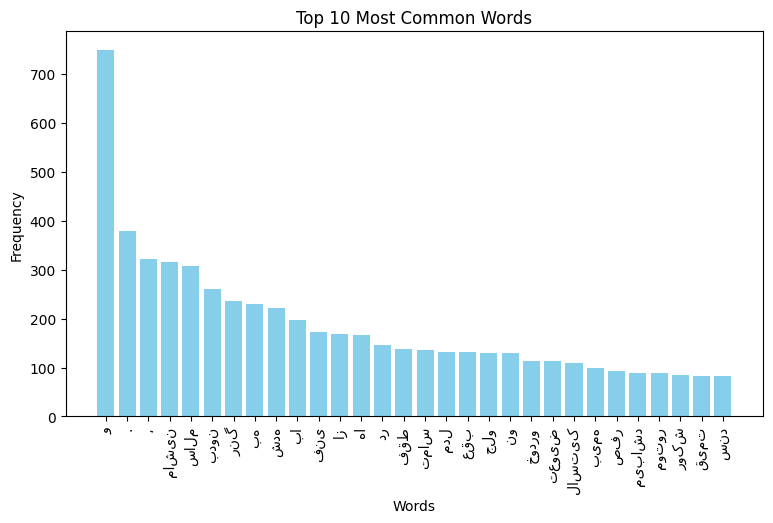

In [15]:
common_words = freq_dist['tehran'].most_common(30)
word_labels, word_counts = zip(*common_words)

# Plotting the bar chart
plt.figure(figsize=(9, 5))
plt.xticks(rotation='vertical')
plt.bar(word_labels, word_counts, color='skyblue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

<div dir="rtl" style="font-size: 18px;">


در این قسمت همانطور که انتظار داریم در داده‌های شهر تهران توکن‌های مثل:
و
.
ام
که در زبان ارزشی ندارند به کرات تکرار شده اند.

البته باز هم همانطور که انتظار می‌رفت کلماتی مثل ماشین، سالم، بدون رنگ هم در این توضیحات به تعداد زیادی تکرار شده‌اند.

</div>

<div dir="rtl" style="font-size: 18px;">

یک بار هم بعد از پیش‌پردازش متن و زمانی که داده‌های بی ارزش را حذف کردیم روی این مقادیر بررسی خواهیم کرد تا فرکانس را برای داده تمیز شده هم ببینیم.

</div>

<div dir="rtl" style="font-size: 18px;">
همچنین دوست داریم طول جملات و تعداد کلمات استفاده شده در توضیحات آگهی‌های شهر‌های مختلف را هم مدنظر و مورد بررسی قرار دهیم که در زیر این کار را قبل از پیش پردازش انجام می‌دهیم.
</div>

In [16]:
sentence_tokenizer = hazm.SentenceTokenizer()
city_sentences_len = {}

for city_slug in cities_slugs:
    sum_len_sentences = 0
    for item in data[city_slug]:
        sum_len_sentences += len(sentence_tokenizer.tokenize(item['description']))
    city_sentences_len[city_slug + '_len_sentences'] = sum_len_sentences / len(data[city_slug])

city_sentences_len

{'tehran_len_sentences': 1.7166666666666666,
 'karaj_len_sentences': 1.6791666666666667,
 'isfahan_len_sentences': 1.725,
 'tabriz_len_sentences': 1.5729166666666667,
 'urmia_len_sentences': 1.58125,
 'rasht_len_sentences': 1.7,
 'sari_len_sentences': 1.4458333333333333,
 'sanandaj_len_sentences': 1.5416666666666667}

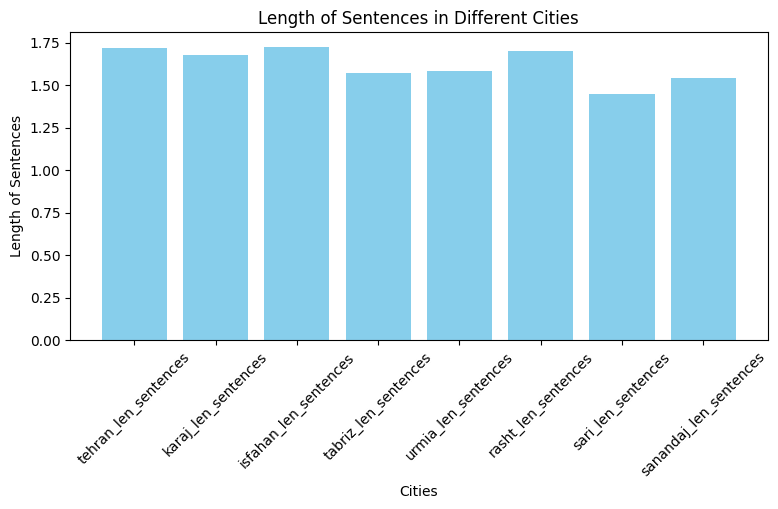

In [17]:
keys = list(city_sentences_len.keys())
values = list(city_sentences_len.values())

# Plotting the bar chart
plt.figure(figsize=(9, 4))
plt.bar(keys, values, color='skyblue')
plt.title('Length of Sentences in Different Cities')
plt.xlabel('Cities')
plt.ylabel('Length of Sentences')
plt.xticks(rotation=45)
plt.show()

<div dir="rtl" style="font-size: 18px;">

با توجه به کیفیت پایین داده‌ها و همچنین اینکه هضم عملکرد خوبی روی تقطیع متن و جملاتی که علائم نگارشی درستی ندارند می‌توانستیم انتظار این را هم داشته باشیم که در این مرحله به درستی تعداد جملات متون تشخیص داده نشود.

چرا که معمولا افرادی که در سایت آگهی می‌گذارند دستورات نگارشی و درست‌نویسی را رعایت نمی‌کنند و در صورتی که داده تا حد خوبی نوشتار درستی نداشته باشد ابزار هضم به درستی نمی‌تواند جملات را جدا بکند.

بدین منظور و برای اطمینان از فرضیه، یکبار هم پس از تمیز کردن دیتا این مورد را بررسی میکنیم.

</div>

In [31]:
def remove_emojis_from_data(text):
    # A regular expression to identify various types of emojis
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
        u"\U000023F0-\U000023F0"  # ALARM CLOCK
                      "]+", re.UNICODE)
    
    # Remove emojis using the regular expression
    return emoji_pattern.sub(r'', text)

example_emojied_text = 'بله، البته که میتوانم. 🌸🌞 امیدوارم روزتان پر از شادی و خوشحالی باشد. 😊🌈'
another_example = '⭐️نمایندگى سلامتیان بابیش از٦٠سال سابقه درخشان درصنعت خودروکشور⭐️\n⭐️پرفروش ترین وبرترین نمایندگى منطقه جنوب کشورواستان'
remove_emojis_from_data(example_emojied_text)
remove_emojis_from_data(another_example)


'نمایندگى سلامتیان بابیش از٦٠سال سابقه درخشان درصنعت خودروکشور\nپرفروش ترین وبرترین نمایندگى منطقه جنوب کشورواستان'

In [19]:
def remove_english_words(text):
    # Define a regular expression pattern to match English words
    english_pattern = re.compile(r'[a-zA-Z]+')
    # Replace English words with an empty string
    result = re.sub(english_pattern, '', text)
    return result

text_with_mixed_words = "این یک متن حاوی English و کلمات فارسی است."
remove_english_words(text_with_mixed_words)

'این یک متن حاوی  و کلمات فارسی است.'

<div dir="rtl" style="font-size: 18px;">

لازم به ذکر است که منبع فایل استفاده شده برای استاپ‌ورد‌های فارسی، مخزن زیر در گیت‌هاب می‌باشد که به نسبت پروژه سبکی که هست تعداد مناسبی هم استار دارد. از این پروژه فایل مربوط به استاپ‌ورد‌های زبان فارسی دانلود شد و در کنار پروژه قرار گرفت.

</div>

https://github.com/kharazi/persian-stopwords/blob/master/persian ==> persian.txt

In [20]:
def remove_stop_words_from_data(text):
    with open('./persian.txt', 'r') as f:
        persian_stopwords = f.read()
        persian_stopwords = persian_stopwords.split('\n')
        revised_text = ' '.join([token for token in hazm.word_tokenize(text) if token not in persian_stopwords])
    return revised_text

remove_stop_words_from_data('سلام من مهدی هستم.')

'سلام مهدی'

In [21]:
def normalize_and_lemmatize_data(text):
    # Normalize the text using hazm library
    tokenizer = hazm.WordTokenizer(join_verb_parts=False, replace_links=True)
    normalizer = hazm.Normalizer()
    lemmatizer = hazm.Lemmatizer()
    
    text_tokens = tokenizer.tokenize(text)
    normalized_tokens = [normalizer.normalize(token) for token in text_tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in normalized_tokens]
    # text = re.sub(r'[^آ-ی0-9a-zA-Z ]', ' ', text)
    cleaned_text = ' '.join(lemmatized_tokens)
    
    # Remove extra spaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    
    # Remove leading and trailing spaces
    cleaned_text = cleaned_text.strip()
    
    return cleaned_text

example_to_normalize = '125این جمله برای تست کارکرد 67 نرمالایزر هضم نوشته شده است.'
normalize_and_lemmatize_data(example_to_normalize)


'۱۲۵ این جمله برای تست کارکرد ۶۷ نرمالایزر هضم نوشته شده #است .'

<div dir="rtl" style="font-size: 18px;">

قسمت مربوط به کد زیر با توجه به اجرای تمام پایپلاین پیش‌پردازش روی داده تقریبا یک ساعت روی سی‌پی‌یو نسل ده کور‌آی سون زمان گرفت. همچنین برای استفاده راحت‌تر کسانی که در آینده کد را می‌خوانند یا اینکه بررسی می‌کنند دامپ داده‌های تمیز شده در فولدر cleaned_data قرار گرفته است.

</div>

### Synchronous Preprocessing

In [28]:
def preprocess_data():
    pipeline = [
        remove_emojis_from_data,
        remove_stop_words_from_data,
        remove_english_words,
        normalize_and_lemmatize_data
    ]
    for city_slug in tqdm.tqdm(cities_slugs, desc="Cities data processing progress"):
        for item in tqdm.tqdm(data[city_slug], desc="Pre-processing descriptions progress"):
            for func in pipeline:
                item['description'] = func(item['description'])

preprocess_data()

Cities data processing progress:   0%|          | 0/8 [00:08<?, ?it/s]


KeyboardInterrupt: 

### Asynchronous Preprocessing

In [34]:
import concurrent.futures

def preprocess_data(city_data):
    pipeline = [
        remove_emojis_from_data,
        remove_stop_words_from_data,
        remove_english_words,
        normalize_and_lemmatize_data
    ]
    for item in tqdm.tqdm(city_data, desc="Pre-processing descriptions"):
        for func in pipeline:
            item['title'] = func(item['title'])
            item['description'] = func(item['description'])
    return city_data

def preprocess_dict_key(key):
    return key, preprocess_data(data[key])

with concurrent.futures.ProcessPoolExecutor() as executor:
    # Using the results to update the dictionary directly
    for key, preprocessed_text in executor.map(preprocess_dict_key, data.keys()):
        data[key] = preprocessed_text


Pre-processing descriptions: 100%|██████████| 480/480 [50:02<00:00,  6.26s/it]


In [35]:
# save the cleaned data so we don't need to run the pre-processing pipeline again
# as it takes a lot of time and is a heavy process

for city_slug in cities_slugs:
    with open(f'data/{city_slug}_car_datas_cleaned.json', 'w', encoding='utf-8') as f:
        json.dump(data[city_slug], f, ensure_ascii=False, indent=4)

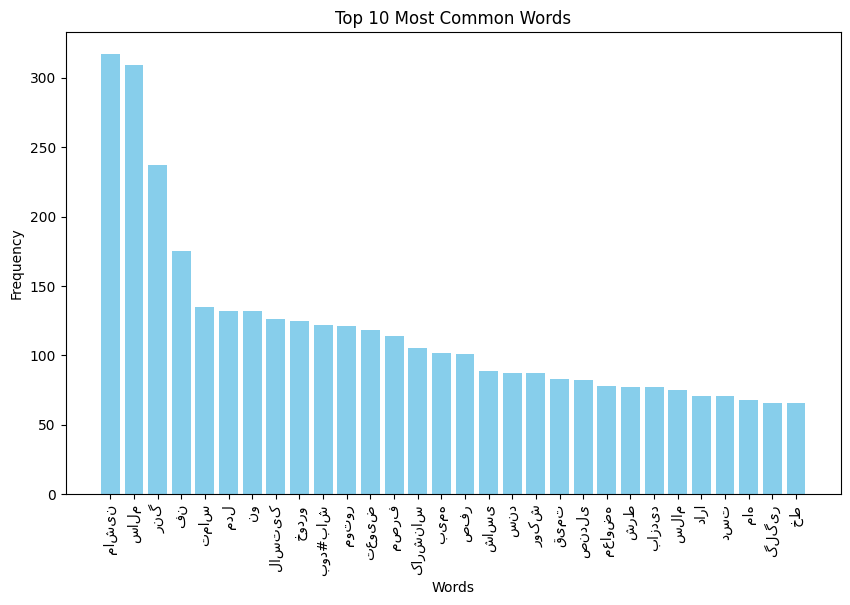

In [36]:
freq_dist = {}
for city_slug in cities_slugs:
    aggregated_descriptions = ''
    for item in data[city_slug]:
        aggregated_descriptions += item.get('description', '') + ' '
    freq_dist[city_slug] = FreqDist(hazm.word_tokenize(aggregated_descriptions))
    del(aggregated_descriptions)

common_words = freq_dist['tehran'].most_common(30)
word_labels, word_counts = zip(*common_words)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.xticks(rotation='vertical')
plt.bar(word_labels, word_counts, color='skyblue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

<div dir="rtl" style="font-size: 18px;">

مثلا در داده‌های بالا همانطور که انتظار داشتیم، پس از حذف موارد اضافه، استاپ‌ورد‌ها و ... به داده دقیق‌تری رسیدیم که تمامی موارد مربوط به ماشین هستند.

</div>

In [37]:
common_words

[('ماشین', 317),
 ('سالم', 309),
 ('رنگ', 237),
 ('فن', 175),
 ('تماس', 135),
 ('مدل', 132),
 ('نو', 132),
 ('لاستیک', 126),
 ('خودرو', 125),
 ('بود#باش', 122),
 ('موتور', 121),
 ('تعویض', 118),
 ('مصرف', 114),
 ('کارشناس', 105),
 ('بیمه', 102),
 ('صفر', 101),
 ('شاسی', 89),
 ('سند', 87),
 ('روکش', 87),
 ('قیمت', 83),
 ('صندلی', 82),
 ('معاوضه', 78),
 ('شرط', 77),
 ('بازدید', 77),
 ('سلام', 75),
 ('دارا', 71),
 ('دست', 71),
 ('ماه', 68),
 ('گلگیر', 66),
 ('خط', 66)]

<div dir="rtl" style="font-size: 18px;">

از فرکانس و تکرار بعضی کلمات در متون آگهی‌ها می‌توانیم موارد جالبی را متوجه شویم. به طور مثال می‌توان فهمید که به احتمال بالا سلامت کلی ماشین برای خریداران از ارزش بالایی برخوردار است.

همچنین وضعیت رنگ، خودرو که می‌توانیم حدس بزنیم که احتمالا نشانه این است که خودرو تصادف داشته، نداشته، یا رنگ و نقاشی و صافکاری شده یا خیر برای خریداران و فروشندگان خودرو از اهمیت بالایی برخوردار است.

به ترتیب موارد دیگری مثل نو بودن، وضعیت موتور، کارشناسی شده بودن خودرو، وضعیت بیمه و شاسی و سند در موارد بعدی آمده است که می‌تواند نشانگر این باشد که برای افراد حاضر در بازار خودرو این موارد تا حد زیادی مهم هستند.

</div>

حال به بررسی و تحلیل تعداد جملات داده‌های هر شهر می‌پردازیم.

In [38]:
sentence_tokenizer = hazm.SentenceTokenizer()
city_sentences_len = {}

for city_slug in cities_slugs:
    sum_len_sentences = 0
    for item in data[city_slug]:
        sum_len_sentences += len(sentence_tokenizer.tokenize(item['description']))
    city_sentences_len[city_slug + '_len_sentences'] = sum_len_sentences / len(data[city_slug])

city_sentences_len

{'tehran_len_sentences': 1.1458333333333333,
 'karaj_len_sentences': 1.0916666666666666,
 'isfahan_len_sentences': 1.13125,
 'tabriz_len_sentences': 1.09375,
 'urmia_len_sentences': 1.0645833333333334,
 'rasht_len_sentences': 1.0916666666666666,
 'sari_len_sentences': 1.1270833333333334,
 'sanandaj_len_sentences': 1.1208333333333333}

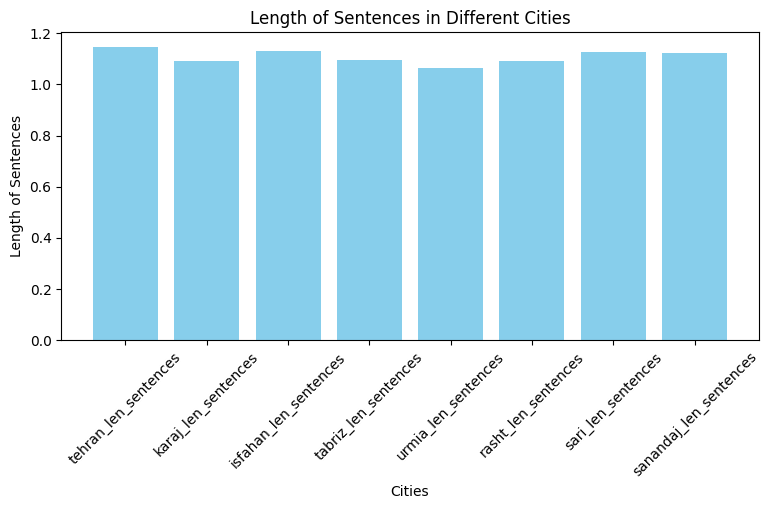

In [39]:
keys = list(city_sentences_len.keys())
values = list(city_sentences_len.values())

# Plotting the bar chart
plt.figure(figsize=(9, 4))
plt.bar(keys, values, color='skyblue')
plt.title('Length of Sentences in Different Cities')
plt.xlabel('Cities')
plt.ylabel('Length of Sentences')
plt.xticks(rotation=45)
plt.show()


<div dir="rtl" style="font-size: 18px;">

همانطور که می‌بینیم تشخیص میانگین تعداد جملات موجود در توضیحات آگهی‌های خودرو توسط هضم، پس از پیش‌پردازش متن و پاکسازی به طور محسوسی تغییر پیدا کرد و این نشان می‌دهد که تمیزکردن و پردازش روی داده‌هایمان را به درستی انجام داده‌ایم.

</div>